<a href="https://colab.research.google.com/github/buixuanthanh96/CS114.K21/blob/master/%C4%91%E1%BB%93_%C3%A1n_cu%E1%BB%91i_k%E1%BB%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bài toán phát hiện đeo khẩu trang
1. Mô tả bài toán:
input= hình ảnh có khuôn mặt
output= cho biết khuôn mặt có đeo khẩu trang hay không

2. Mô tả về bộ dữ liệu: 
+ cách thức xây dựng bộ dữ liệu: dữ liệu thu thập từ google image
+ số lượng: 600 khuôn mặt người đeo khẩu trang và 600 khuôn mặt người không đeo khẩu trang
+ các thao tác tiền xử lý dữ liệu: tách khuôn mặt trong ảnh, sau đó dán nhãn cho data
+ phân chia (split) - train/test: 80/20

3. Mô tả về đặc trưng
+ trích xuất ảnh thành vecter đặc trưng(dùng Histogram of Oriented Gradients)

4. Mô tả về thuật toán máy học:
+ sử dụng một số thuật toán máy học: Linear SVM, K – Nearest Neighbors, naive_bayes, Random Forest
5. Cài đặt, tinh chỉnh tham số

6. Đánh giá kết quả, kết luận




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

path = "/content/drive/My Drive/"
os.chdir(path)

In [6]:
! pip install face-detection

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import face_detection
import os
import glob2
import os
from sklearn.metrics import classification_report
from requests import get  # to make GET request
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

Tách khuôn mặt trong ảnh

In [ ]:
#tách khuôn mặt trong ảnh ra
path_to_image="/content/drive/My Drive/mask_data/data/"
path_to_image2="/content/drive/My Drive/mask_data/traindata/"

detector = face_detection.build_detector("DSFDDetector", confidence_threshold=.5, nms_iou_threshold=.3) # khởi tạo "model"
for label in os.listdir(path_to_image) :
  for img_file in os.listdir(os.path.join(path_to_image, label)):
    if not (label.startswith('.') or img_file.startswith('.') or label.startswith('mask')):
      img = glob2.glob(os.path.join(path_to_image+label+"/", img_file))
      image = cv2.imread(img[0],cv2.IMREAD_COLOR)
      detections = detector.detect(image) # nhận diện gương mặt trong ảnh
      i=0
      print((img_file))
      for face in range(len(detections)):
        pts1 = (detections[face][0],detections[face][1])
        pts2 = (detections[face][2],detections[face][3])
        img_crop = image[(int)(detections[face][1]):(int)(detections[face][3]), (int)(detections[face][0]):(int)(detections[face][2]), :]
        os.chdir(path_to_image2+label)
        if(i==0 and detections[face][0]>=0 and detections[face][2]>=0 ):
          cv2.imwrite(img_file, img_crop)
        else:
          path=str(i)+"_"+img_file
          cv2.imwrite(path, img_crop)
        i=i+1



In [80]:
!pip install ipyplot


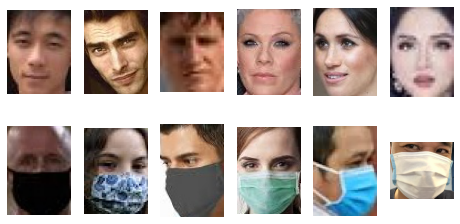

In [159]:
# Ảnh sau khi sử lý tách face
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

w=96
h=128
fig=plt.figure(figsize=(8, 4))
columns = 6
rows = 2
j=50
for i in range(1, columns*rows +1):
    img= mpimg.imread(X[j][0])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
    j=j+100
plt.show()


with mask:  620
without mask:  615


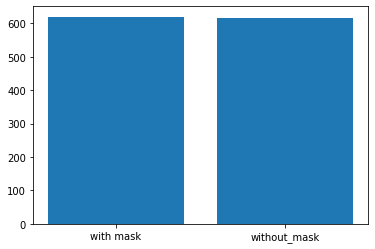

In [160]:
print("with mask: ",len(os.listdir("/content/drive/My Drive/mask_data/traindata/with_mask")))
print("without mask: ",len(os.listdir("/content/drive/My Drive/mask_data/traindata/without_mask")))

import matplotlib.pyplot as plt

plt.bar(['with mask','without_mask'],[len(os.listdir("/content/drive/My Drive/mask_data/traindata/with_mask")),len(os.listdir("/content/drive/My Drive/mask_data/traindata/without_mask"))])
plt.title("")
plt.show()


In [133]:
#xây dựng inputdata và dán nhãn dữ liêu
import numpy as np
import pandas as pd

path_to_image="/content/drive/My Drive/mask_data/traindata/"
X = [] #chứa image
Y = [] #chứa label
data=[]
for label in os.listdir(path_to_image) :
  for img_file in os.listdir(os.path.join(path_to_image, label)):
    if not (label.startswith('.') or img_file.startswith('.')):
      img = glob2.glob(os.path.join(path_to_image+label+"/", img_file))
      X.append(img)
      Y.append(label)
      data.append((img,label))
# Create train.txt
# with open("train.txt", "w") as f:
#   for idx in np.arange(len(all_files)):
#     # if idx not in rand_idx:
#     f.write(all_files[idx]+'\n')

df = pd.DataFrame({'image_path':X,"label":Y})
df

,image_path,label
0,[/content/drive/My Drive/mask_data/traindata/w...,without_mask
1,[/content/drive/My Drive/mask_data/traindata/w...,without_mask
2,[/content/drive/My Drive/mask_data/traindata/w...,without_mask
3,[/content/drive/My Drive/mask_data/traindata/w...,without_mask
4,[/content/drive/My Drive/mask_data/traindata/w...,without_mask
...,...,...
1230,[/content/drive/My Drive/mask_data/traindata/w...,with_mask
1231,[/content/drive/My Drive/mask_data/traindata/w...,with_mask
1232,[/content/drive/My Drive/mask_data/traindata/w...,with_mask
1233,[/content/drive/My Drive/mask_data/traindata/w...,with_mask


In [46]:
#trích xuất đạc trưng hog
import cv2

image_descriptors = []
def extract_hog_features(X):
  hog = cv2.HOGDescriptor()
  for i in range(len(X)):
    image = cv2.imread(X[i][0], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(src=image, dsize=(96, 128))
    feature_hog = hog.compute(img).flatten()
    image_descriptors.append(feature_hog)
  return image_descriptors

X_features=extract_hog_features(X)
# print(X_features[0].shape)
# print(X_features[0])


In [47]:
#phân chia dữ liệu train/test
X_train, X_test, Y_train, Y_test= train_test_split(X_features,Y,test_size=0.2)
print("TRAIN: "+str(len(X_train))+ " TEST: "+str(len(X_test)))

TRAIN: 988 TEST: 247


In [49]:
#train và test với svm
#
from sklearn.metrics import classification_report

clf_svm = LinearSVC()
clf_svm.fit(X_train,Y_train)
print("*** TRAINING END ***")
predict = clf_svm.predict(X_test)

idx = 0
true = 0
false = 0
for i in X_test:
    if predict[idx]==Y_test[idx]:
        true +=1
    else:
        false +=1
    idx +=1

print(classification_report(Y_test,predict,["with_mask","without_mask"]))
# accuracy =  (true/(true+false))*100
# print("*SVM*")
# print("Đoán đúng: ",true)
# print("Đoán sai: ",false)
# print("Accuracy: ",accuracy, "%")
#save model



*** TRAINING END ***
              precision    recall  f1-score   support

   with_mask       0.91      0.90      0.91       128
without_mask       0.89      0.91      0.90       119

    accuracy                           0.90       247
   macro avg       0.90      0.90      0.90       247
weighted avg       0.90      0.90      0.90       247



In [ ]:
os.chdir("/content/drive/My Drive/mask_data")
clf_svm = load('clf_svm.joblib') 

In [50]:
#train và test với K – Nearest Neighbors – KNN
# import time
# start_time = time.time()

clf_knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',p=1)
clf_knn.fit(X_train,Y_train)
print("*** TRAINING END ***")
predict = clf_knn.predict(X_test)

idx = 0
true = 0
false = 0
for i in X_test:
    if predict[idx]==Y_test[idx]:
        true +=1
    else:
        false +=1
    idx +=1

print(classification_report(Y_test,predict,["with_mask","without_mask"]))



*** TRAINING END ***
              precision    recall  f1-score   support

   with_mask       0.94      0.94      0.94       128
without_mask       0.93      0.93      0.93       119

    accuracy                           0.94       247
   macro avg       0.94      0.94      0.94       247
weighted avg       0.94      0.94      0.94       247



In [ ]:
os.chdir("/content/drive/My Drive/mask_data")
dump(clf_svm, 'clf_svm.joblib') 

In [51]:
#train và test với naive_bayes

clf_nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
clf_nb.fit(X_train,Y_train)
print("*** TRAINING END ***")
predict = clf_nb.predict(X_test)

idx = 0
true = 0
false = 0
for i in X_test:
    if predict[idx]==Y_test[idx]:
        true +=1
    else:
        false +=1
    idx +=1

print(classification_report(Y_test,predict,["with_mask","without_mask"]))


*** TRAINING END ***
              precision    recall  f1-score   support

   with_mask       0.86      0.90      0.88       128
without_mask       0.88      0.84      0.86       119

    accuracy                           0.87       247
   macro avg       0.87      0.87      0.87       247
weighted avg       0.87      0.87      0.87       247



In [52]:
#train và test với Random Forest

#Create model
clf_rf=RandomForestClassifier(n_estimators=500)

#Train the model
clf_rf.fit(X_train,Y_train)
print("*** TRAINING END ***")
predict = clf_rf.predict(X_test)

idx = 0
true = 0
false = 0
for i in X_test:
    if predict[idx]==Y_test[idx]:
        true +=1
    else:
        false +=1
    idx +=1

print(classification_report(Y_test,predict,["with_mask","without_mask"]))


*** TRAINING END ***
              precision    recall  f1-score   support

   with_mask       0.94      0.91      0.92       128
without_mask       0.90      0.93      0.92       119

    accuracy                           0.92       247
   macro avg       0.92      0.92      0.92       247
weighted avg       0.92      0.92      0.92       247



Sau khi chạy một số thuật toán. SVM cho độ chính xác cao nhất nên chọn svm để làm model chạy dự đoán

In [56]:
#hàm tải ảnh trên mạng về
def download(url, file_name):
    # open in binary mode
    with open(file_name, "wb") as file:
        # get request
        response = get(url)
        # write to file
        file.write(response.content)
        img=cv2.imread(file_name)
        return img


nhập đường dẫn ảnh
https://afamilycdn.com/2020/1/24/photo-1579882971330-15798829713381250458250.png


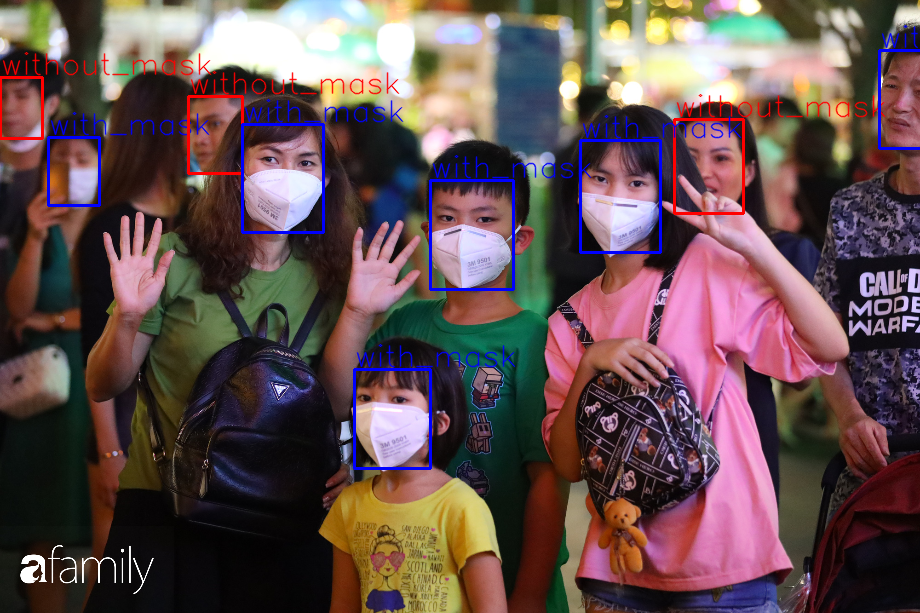

In [66]:
#chạy dự đoán

print("nhập đường dẫn ảnh")
path_to_image =input()
if not (path_to_image.startswith('https://')):
  image = cv2.imread(path_to_image)
else:
  image=download(path_to_image,"test.png")

detector = face_detection.build_detector("DSFDDetector", confidence_threshold=.5, nms_iou_threshold=.3) # khởi tạo "model"
detections = detector.detect(image) # nhận diện gương mặt trong ảnh
#color in BGR 
color1 = (255, 0, 0)   
color2 = (0, 0, 255)   
# Line thickness of 2 px 
thickness = 2
font = cv2.FONT_HERSHEY_SIMPLEX

# Draw detect box on image
for face in range(len(detections)):
  pts1 = (detections[face][0],detections[face][1])
  pts2 = (detections[face][2],detections[face][3])
  img_crop = image[(int)(detections[face][1]):(int)(detections[face][3]), (int)(detections[face][0]):(int)(detections[face][2]), :]
  
  img = cv2.resize(src=img_crop, dsize=(96, 128))
  img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  hog = cv2.HOGDescriptor()
  feature_hog = hog.compute(img).flatten()
  pre=clf_knn.predict([feature_hog])
  if(pre[0]=="with_mask"):
    color=color1
  else:
    color=color2
  image = cv2.rectangle(image, pts1, pts2, color, thickness)
  cv2.putText(image,pre[0],((int)(detections[face][0]),(int)(detections[face][1])-3), font, 1,color,1,cv2.LINE_AA)
cv2_imshow(image)
